In [1]:
import numpy as np 
import pandas as pd
import sys
import random as rd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Load the data

In [2]:
from logistic_regression.logistic_regression import LogisticRegression

lm=LogisticRegression()
lm.load_data('./data/Google-Playstore.csv')
# As a sanity chech, we print out the size of the training data (1000, 5) and training labels (1000,)
print('Training data shape: ', lm.train_x.shape)
print('Training labels shape:', lm.train_y.shape)

Training data shape:  (1734708, 11)
Training labels shape: (1734708,)


In [4]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils
import pandas as pd
import numpy as np

dataframe = pd.read_csv('./data/Google-Playstore.csv')
    
# dataframe = dataframe.query('Category == "Adventure"')
rating_avg = dataframe["Rating"].mean()
# print(rating_avg)
dataframe['Rating'] = dataframe['Rating'].fillna(rating_avg)
dataframe = dataframe.fillna(0)
y = dataframe['Rating']


#all categories ['App Name', 'App Id', 'Category', 'Rating', 'Rating Count' , 'Installs' , 'Minimum Installs', 'Maximum Installs', 'Free','Price', 'Currency' , 'Size', 'Minimum Android', 'Developer Id', 'Developer Website', 'Developer Email', 'Released', 'Last Updated' , 'Content Rating','Privacy Policy', 'Ad Supported' ,'In App Purchases', 'Editors Choice' ,'Scraped Time']
todrop = ['App Name', 'App Id', 'Category', 'Rating', 'Rating Count' , 'Installs' , 'Minimum Installs', 'Price', 'Currency', 'Size', 'Minimum Android', 'Developer Id', 'Developer Website', 'Developer Email', 'Released', 'Last Updated', 'Privacy Policy' ,'Scraped Time']
# 'Ad Supported' , 'In App Purchases', 'Editors Choice'
# todrop.pop(filterID)
X = dataframe.drop(todrop, axis=1)

X["Ad Supported"] = X['Ad Supported'].astype(int)
X['In App Purchases'] = X['In App Purchases'].astype(int)
X['Editors Choice'] = X['Editors Choice'].astype(int)
y = y.astype(str)
lab = preprocessing.LabelEncoder()
X['Maximum Installs'] = lab.fit_transform(X['Maximum Installs'])
X = pd.get_dummies(X , columns = ['Content Rating'])

X, test_x, y, test_y = train_test_split(X, y, train_size=0.8)

formatted_test_y = []
for x in test_y:
    formatted_test_y.append(float(x))

In [5]:
from sklearn.metrics import mean_squared_error
import numpy as np

clf = LogisticRegression(random_state=0, max_iter=1000, multi_class='auto', dual=False).fit(X, y)
print("Accuracy for 1000 iterations:")
clf.score(test_x, test_y)

testing_mse = mean_squared_error(clf.predict(test_x), formatted_test_y)
print("Mean squared error for 1000 iterations:")
print(testing_mse)


/Users/CareBear/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for 1000 iterations:
Mean squared error for 1000 iterations:
3.1074847735865214


In [6]:

clf2 = LogisticRegression(random_state=0, max_iter=100).fit(X, y)
print("Accuracy for 100 iterations:")
clf2.score(test_x, test_y)

testing_mse = mean_squared_error(clf2.predict(test_x), formatted_test_y)
print("Mean squared error for 100 iterations:")
print(testing_mse)

/Users/CareBear/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for 100 iterations:
Mean squared error for 100 iterations:
8.031512758840957


In [9]:
# # clf = LogisticRegression(random_state=0).fit(X, y)
# from sklearn.metrics import mean_squared_error
# import numpy as np


# # uniqueClasses = np.unique(test_y.astype(float))

# clf = LogisticRegression(random_state=0, max_iter=1000, multi_class='auto', dual=False).fit(X, y)
# print("Accuracy for 1000 iterations:")
# clf.score(test_x, test_y)

# # probs = clf.predict_proba(test_x)
# # print(probs)

# formatted_test_y = []
# for x in test_y:
#     formatted_test_y.append(float(x))

# # temp = clf.predict(test_x)
# # for x in temp:
# #     if (x != '4.3') and (x != '4.2') and (x != '4.3'):
# #         print(x)

# testing_mse = mean_squared_error(clf.predict(test_x), formatted_test_y)
# print("Mean squared error for 1000 iterations:")
# print(testing_mse)

# clf2 = LogisticRegression(random_state=0, max_iter=100).fit(X, y)
# print("Accuracy for 100 iterations:")
# clf2.score(test_x, test_y)
# testing_mse = mean_squared_error(clf2.predict(test_x), formatted_test_y)
# print("Mean squared error for 100 iterations:")
# print(testing_mse)

/Users/CareBear/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for 1000 iterations:
Mean squared error for 1000 iterations:
3.2292635560952085


/Users/CareBear/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for 100 iterations:
Mean squared error for 100 iterations:
8.399978207065704


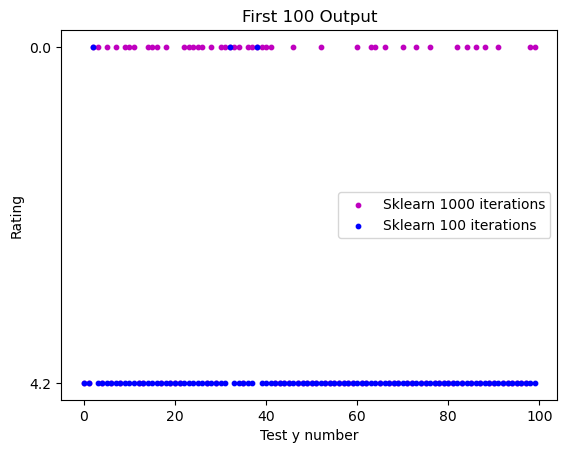

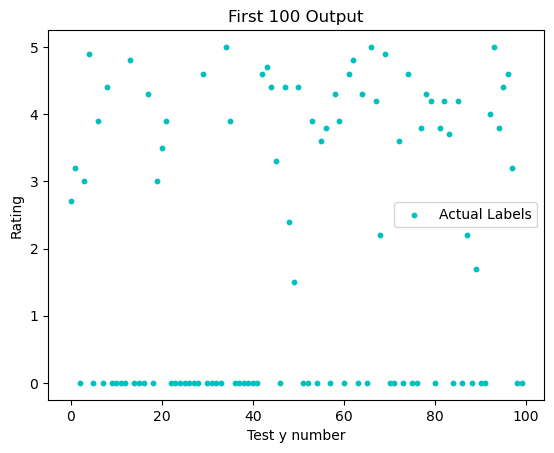

In [7]:
import matplotlib
from matplotlib import pyplot as plt

test_y_100 = formatted_test_y[:100]

pred_y_1000_100 = clf.predict(test_x)[:100]

pred_y_100_100 = clf2.predict(test_x)[:100]

iters = [*range(0,100,1)]

plt.yscale("linear")
plt.scatter(iters, pred_y_1000_100, 10, c='m', label = "Sklearn 1000 iterations")
plt.scatter(iters, pred_y_100_100, 10, c='b', label = "Sklearn 100 iterations")


plt.legend(loc = 'best')
plt.xlabel('Test y number')
plt.ylabel('Rating')
plt.title('First 100 Output')

plt.show()

plt.scatter(iters, test_y_100, 10, c='c', label = "Actual Labels")
plt.legend(loc = 'best')
plt.xlabel('Test y number')
plt.ylabel('Rating')
plt.title('First 100 Output')

plt.show()


Batch Gradient Descent

In [11]:
from hw1code.logistic_regression import LogisticRegression
lm=LogisticRegression(num_iter=1000)
lm.load_data('./data/Google-Playstore.csv')
training_accuracy= 0
testing_accuracy= 0
lm.normalize()  

In [12]:
beta = lm.train()
training_accuracy = lm.compute_accuracy(lm.predict(lm.train_x, beta), lm.train_y)
testing_accuracy = lm.compute_accuracy(lm.predict(lm.test_x, beta), lm.test_y)
print('Training accuracy is: ', training_accuracy)
print('Testing accuracy is: ', testing_accuracy)

average logL for iteration 0: -0.6366114399758404 	
average logL for iteration 100: -0.6595375386192495 	
average logL for iteration 200: -0.682391444306547 	
average logL for iteration 300: -0.7051741022425363 	
average logL for iteration 400: -0.727916284563309 	
average logL for iteration 500: -0.7505575907267779 	
average logL for iteration 600: -0.7731300116498397 	
average logL for iteration 700: -0.795632832629571 	
average logL for iteration 800: -0.8180662407893494 	
average logL for iteration 900: -0.8404311406640176 	
Training avgLogL:  -0.8625055387548931
Training accuracy is:  0.2398830235405613
Testing accuracy is:  0.24006461029752557


In [14]:
from sklearn.metrics import mean_squared_error
training_mse = mean_squared_error(lm.predict(lm.train_x, beta), lm.train_y)
testing_mse = mean_squared_error(lm.predict(lm.test_x, beta), lm.test_y)
print("MSE for Training data is: ", training_mse)
print("MSE for Testing data is ", testing_mse)

MSE for Training data is:  6.965777520509459
MSE for Testing data is  6.960352777903095
